
# Reinforcement Learning Project – Blackjack (Discrete Environment)

## Environment Overview
In this part of the project, we address the **Blackjack-v1** environment from Gymnasium. This environment simulates the popular card game, where the agent must decide whether to "hit" or "stick" to reach a sum close to 21, without exceeding it. The game is simple yet involves probabilistic reasoning, making it an ideal setting for comparing different reinforcement learning methods.

### Environment Characteristics:
- **Observation space**: Tuple of 3 discrete values:  
  - Player's current sum (0–32)  
  - Dealer's showing card (1–10)  
  - Usable ace (True/False)  
- **Action space**:  
  - 0 = Stick  
  - 1 = Hit  

## Algorithms Implemented
To explore how different learning strategies behave in a discrete setting, we implement and compare the following algorithms:
1. **Q-Learning** – A model-free, off-policy method based on value iteration.  
2. **Monte Carlo Control** – A model-free, on-policy method based on episode returns.





<div style="text-align: center;">
    <strong style="display: block; margin-bottom: 10px;">Group ??</strong> 
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Joana Rodrigues</td>
            <td style="border: 1px solid white; padding: 8px;">20240603</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Mara Simões</td>
            <td style="border: 1px solid white; padding: 8px;">20240326</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Matilde Street</td>
            <td style="border: 1px solid white; padding: 8px;">20240523</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Tomás Luzia</td>
            <td style="border: 1px solid white; padding: 8px;">20230477</td>
        </tr>
    </table>
</div>

### 🔗 Table of Contents <a id='table-of-contents'></a>
1. [Imports](#imports)
---

# 1. Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# 2. Q-Learning

Initialization of the environment and the parameters to use

In [13]:
env_name = "Blackjack-v1"
env = gym.make(env_name)

alpha = 0.1       
gamma = 1.0      
epsilon = 0.1       
num_episodes = 500_000


Q = defaultdict(lambda: np.zeros(env.action_space.n))


Epsilon-Greedy Policy Function

In [14]:
# Função para escolher uma ação baseada em política ε-greedy
def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Exploração
    else:
        return np.argmax(Q[state])        # Exploração

 Q-Learning Training Function

In [15]:
# Q-learning training function
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = []

    for episode in tqdm(range(num_episodes)):
        state = env.reset()[0]
        done = False

        while not done:
            action = epsilon_greedy_policy(state, Q, epsilon)
            next_state, reward, done, truncated, info = env.step(action)

            # Q-learning update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state

        returns.append(reward)

    return Q, returns


Training the Agent

In [16]:
# Train the agent
Q, returns = q_learning(env, num_episodes, alpha, gamma, epsilon)

env.close()

  0%|          | 0/500000 [00:00<?, ?it/s]

Results Analysis

In [17]:
# Analyze results
print("Average reward (last 1000 episodes):", np.mean(returns[-1000:]))


Average reward (last 1000 episodes): -0.128


Extracting the Learned Optimal Policy

In [18]:
# Function to extract the learned optimal policy
def extract_policy(Q):
    policy = {}
    for state, actions in Q.items():
        policy[state] = np.argmax(actions)
    return policy

# Generate the learned policy
optimal_policy = extract_policy(Q)


 Compute Value Function V(s)

In [19]:
# Compute V(s) for the most probable actions
def compute_value_function(Q):
    V = defaultdict(float)
    for state, actions in Q.items():
        V[state] = np.max(actions)
    return V

V = compute_value_function(Q)


Plot Value Function as Heatmap

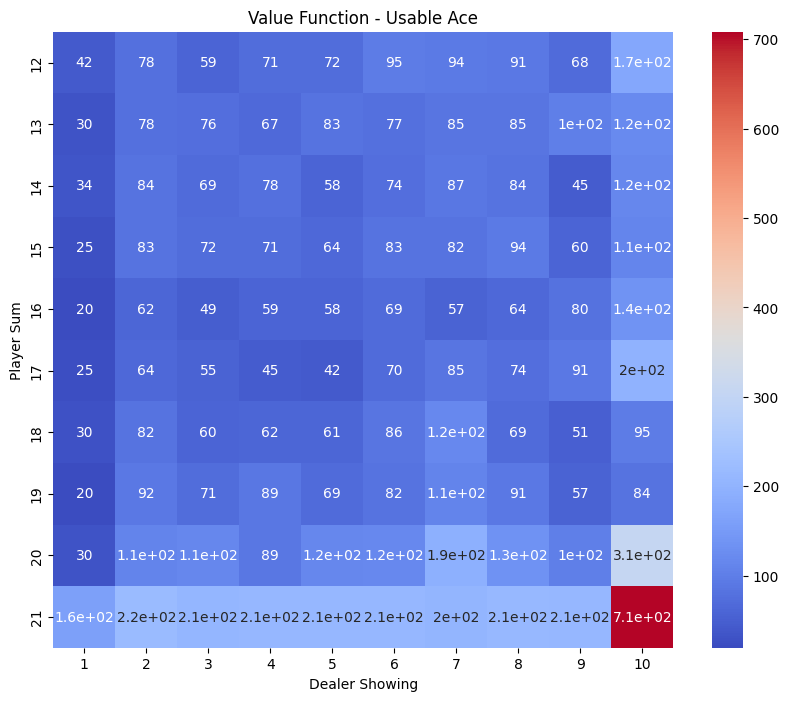

In [20]:
# Prepare data for plotting
def plot_value_function(V, usable_ace=True):
    value_grid = np.zeros((10, 10))
    for player_sum in range(12, 22):
        for dealer_show in range(1, 11):
            state = (player_sum, dealer_show, usable_ace)
            value_grid[player_sum - 12, dealer_show - 1] = V.get(state, 0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(value_grid, annot=True, cmap="coolwarm", xticklabels=range(1,11), yticklabels=range(12,22))
    plt.xlabel("Dealer Showing")
    plt.ylabel("Player Sum")
    plt.title("Value Function - Usable Ace" if usable_ace else "Value Function - No Usable Ace")
    plt.show()

# Plot both versions (with and without usable ace)
plot_value_function(V, usable_ace=True)


In [ ]:
class BlackjackAgent:
    def __init__(
        self,
        env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, env, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [ ]:
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [ ]:
env = gym.wrappers.RecordEpisodeStatistics(env)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(env, obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:24<00:00, 4040.26it/s]


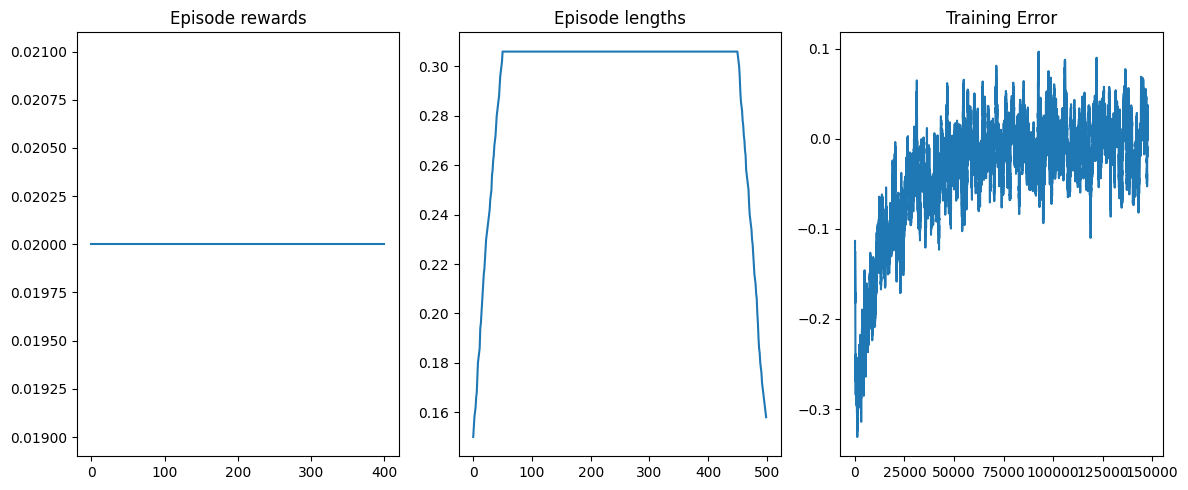

In [ ]:
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[2].set_title("Training Error")
training_error_moving_average = (
    np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
plt.tight_layout()
plt.show()

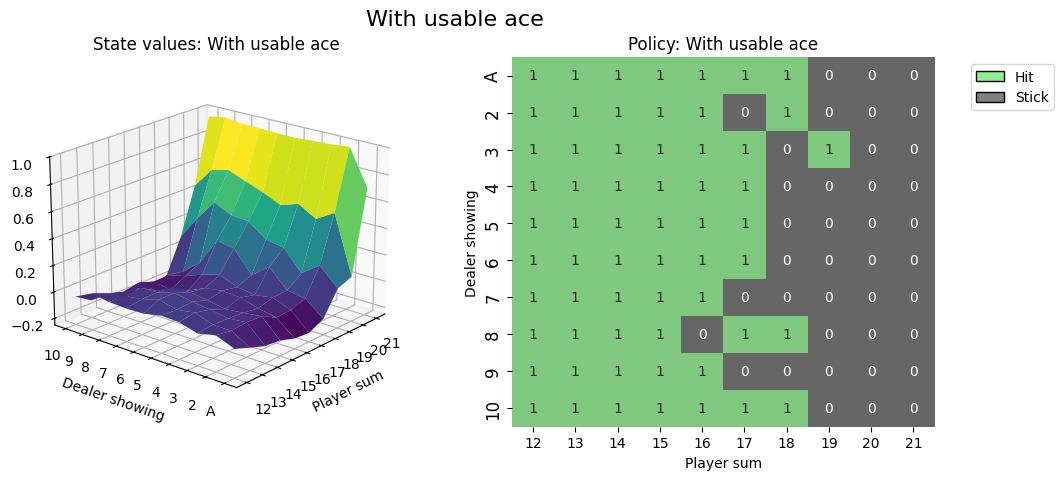

In [ ]:
def create_grids(agent, usable_ace=False):
    """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )

    # create the value grid for plotting
    value = np.apply_along_axis(
        lambda obs: state_value[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    value_grid = player_count, dealer_count, value

    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return value_grid, policy_grid


def create_plots(value_grid, policy_grid, title: str):
    """Creates a plot using a value and policy grid."""
    # create a new figure with 2 subplots (left: state values, right: policy)
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # plot the state values
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig


# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

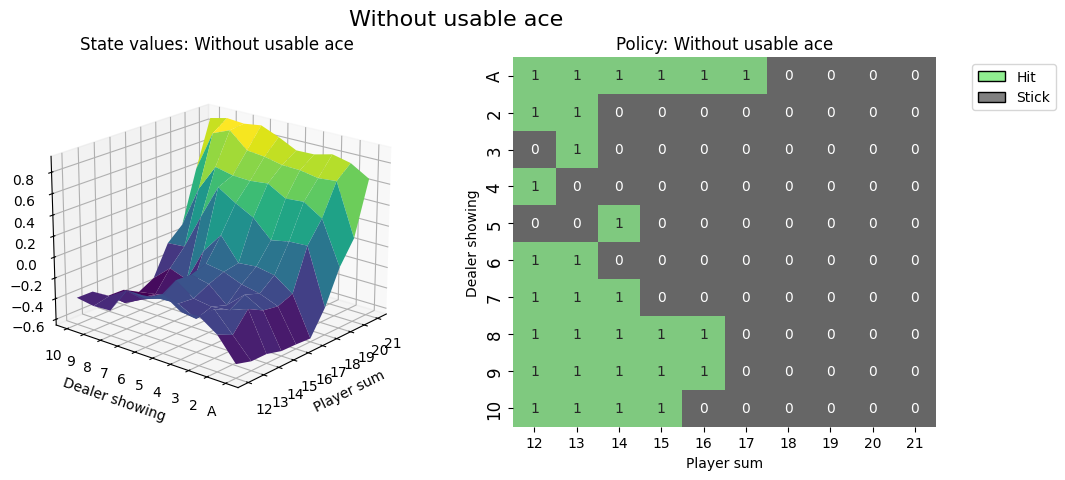

In [ ]:
# state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = create_grids(agent, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()


# 3. Monte Carlo